<a href="https://colab.research.google.com/github/Plusholic/Bayes_study/blob/main/chap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Odds and Addends

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [2]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12125 sha256=02a320ba768c1d5ed2a72060de2f62d2472c3ec68db33d4329ea5d317c7409ed
  Stored in directory: /root/.cache/pip/wheels/c2/3f/cf/74b5adbcea4efaae43ce168e622e3eb8dbc1251d5d730dd245
Successfully built empiricaldist


In [1]:
# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

Downloaded utils.py


In [3]:
from utils import set_pyplot_params
set_pyplot_params()

This chapter presents a new way to represent a degree of certainty, **odds**, and a new form of Bayes's Theorem, called **Bayes's Rule**.
Bayes's Rule is convenient if you want to do a Bayesian update on paper or in your head.
It also sheds light on the important idea of **evidence** and how we can quantify the strength of evidence.

The second part of the chapter is about "addends", that is, quantities being added, and how we can compute their distributions.
We'll define functions that compute the distribution of sums, differences, products, and other operations.
Then we'll use those distributions as part of a Bayesian update.

## Odds

확률을 나타내는 한 가지 방법은 0과 1 사이의 숫자로 나타내는 법이지만, 이것만이 유일한 방법은 아니다.
축구나 경마에 돈을 걸어본 적이 잇다면, 아마 **odds** 라고 불리는 확률 표현 방법을 접해봤을 것이다.

You might have heard expressions like "the odds are three to one", but you might not know what that means.
**odds in favor**는 이 사건이 일어날 확률 대 일어나지 않았을 확률의 비율이다.

The following function does this calculation.

In [4]:
def odds(p):
    return p / (1-p)

For example, if my team has a 75% chance of winning, the odds in their favor are three to one, because the chance of winning is three times the chance of losing.

In [5]:
odds(0.75)

3.0

You can write odds in decimal form, but it is also common to
write them as a ratio of integers.
So "three to one" is sometimes written $3:1$.

When probabilities are low, it is more common to report the
**odds against** rather than the odds in favor.
For example, if my horse has a 10% chance of winning, the odds in favor are $1:9$.

In [6]:
odds(0.1)

0.11111111111111112

But in that case it would be more common I to say that the odds against are $9:1$.

In [7]:
odds(0.9)

9.000000000000002

Given the odds in favor, in decimal form, you can convert to probability like this:

In [8]:
def prob(o):
    return o / (o+1)

For example, if the odds are $3/2$, the corresponding probability is $3/5$:

In [9]:
prob(3/2)

0.6

Or if you represent odds with a numerator and denominator, you can convert to probability like this:

In [10]:
def prob2(yes, no):
    return yes / (yes + no)

In [11]:
prob2(3, 2)

0.6

확률과 오즈는 동일한 정보를 다르게 표현한다. 이 중 하나가 주어진다면, 다른 형태도 구할 수 있다. 하지만 어떤 계산은 공산을 쓸 때 더 편하다. 이에 대해서는 다음 절에서 살펴보자. 로그 공산을 쓸 때 더 펴한 경우도 있는데, 이는 나중에 살펴보자.

## Bayes's Rule

So far we have worked with Bayes's theorem in the "probability form": 

$$P(H|D) = \frac{P(H)~P(D|H)}{P(D)}$$

Writing $\mathrm{odds}(A)$ for odds in favor of $A$, we can express Bayes's Theorem in "odds form":

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

This is Bayes's Rule, which says that the posterior odds are the prior odds times the likelihood ratio.
Bayes's Rule is convenient for computing a Bayesian update on paper or in your head. For example, let's go back to the cookie problem:

> Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

The prior probability is 50%, so the prior odds are 1. The likelihood ratio is $\frac{3}{4} / \frac{1}{2}$, or $3/2$. So the posterior odds are $3/2$, which corresponds to probability $3/5$.

In [ ]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds

In [ ]:
post_prob = prob(post_odds)
post_prob

If we draw another cookie and it's chocolate, we can do another update:

In [ ]:
likelihood_ratio = (1/4) / (1/2)
post_odds *= likelihood_ratio
post_odds

And convert back to probability.

In [ ]:
post_prob = prob(post_odds)
post_prob

## Oliver's Blood

I’ll use Bayes’s Rule to solve another problem from MacKay’s
[*Information Theory, Inference, and Learning Algorithms*](https://www.inference.org.uk/mackay/itila/):

> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type ‘O’ blood. The blood groups of the two traces are found to be of type ‘O’ (a common type in the local population, having frequency 60%) and of type ‘AB’ (a rare type, with frequency 1%). Do these data \[the traces found at the scene\] give evidence in favor of the proposition that Oliver was one of the people \[who left blood at the scene\]?

To answer this question, we need to think about what it means for data
to give evidence in favor of (or against) a hypothesis. Intuitively, we might say that data favor a hypothesis if the hypothesis is more likely in light of the data than it was before.

In the cookie problem, the prior odds are 1, which corresponds to probability 50%. The posterior odds are $3/2$, or probability 60%. So the vanilla cookie is evidence in favor of Bowl 1.

Bayes's Rule provides a way to make this intuition more precise. Again

$$\mathrm{odds}(A|D) = \mathrm{odds}(A)~\frac{P(D|A)}{P(D|B)}$$

Dividing through by $\mathrm{odds}(A)$, we get: 

$$\frac{\mathrm{odds}(A|D)}{\mathrm{odds}(A)} = \frac{P(D|A)}{P(D|B)}$$

좌항은 사후 공산과 사전 공산의 비다. 우측 항은 가능도비로, 베이즈 요인이라고 한다.
베이즈 요인이 1보다 크면, 데이터는 B의 가정보다 A의 가정 하에 존재하는 게 더 가깝다는 뜻이다. 또한 데이터를 반영한 후 전보다 공산이 커졌음을 의미한다.

베이즈 요인이 1보다 작다면, 데이터가 A의 가정보다 B의 가정 하에 존재할 가능성이 높다는 뜻이다. 따라서 A의 승산은 낮아진다. 그리고 베이즈 요인이 정확히 1이라면, 데이터는 양쪽 가설 하에서 동일한 가능성을 가지므로, 공산은 변하지 않는다.

Finally, if the Bayes factor is exactly 1, the data are equally likely
under either hypothesis, so the odds do not change.

Let's apply that to the problem at hand. If Oliver is one of the people who left blood at the crime scene, he accounts for the ‘O’ sample; in that case, the probability of the data is the probability that a random member of the population has type ‘AB’ blood, which is 1%.

If Oliver did not leave blood at the scene, we have two samples to
account for. 
If we choose two random people from the population, what is the chance of finding one with type ‘O’ and one with type ‘AB’? 
Well, there are two ways it might happen: 

* The first person might have ‘O’ and the second ‘AB’, 

* Or the first person might have ‘AB’ and the second ‘O’.

The probability of either combination is $(0.6) (0.01)$, which is 0.6%, so the total probability is twice that, or 1.2%.
So the data are a little more likely if Oliver is *not* one of the people who left blood at the scene.

We can use these probabilities to compute the likelihood ratio:

In [12]:
like1 = 0.01
like2 = 2 * 0.6 * 0.01

likelihood_ratio = like1 / like2
likelihood_ratio

0.8333333333333334

likelihood ratio가 1보다 작으므로, 혈액형 검사는 올리버가 현장에 혈흔을 남겼다는 가설에 반하는 증거가 된다.

하지만 이는 약한 증거다. 예를 들어, prior odds가 1(50%의 확률)이라면, 사후 공산은 45%에 해당하는 0.83이 된다.

In [13]:
post_odds = 1 * like1 / like2
prob(post_odds)

0.45454545454545453

이 증거는 '판을 뒤집는' 증거는 아니다.

이 예제는 조금 억지스럽지만, 가설에 부합하는 데이터가 항상 가설에 유리한 것은 아니라는, 직관에 어긋나는 결과에 대한 예시를 보여준다.

If this result still bothers you, this way of thinking might help: the
data consist of a common event, type ‘O’ blood, and a rare event, type
‘AB’ blood. If Oliver accounts for the common event, that leaves the
rare event unexplained. If Oliver doesn’t account for the ‘O’ blood, we
have two chances to find someone in the population with ‘AB’ blood. And
that factor of two makes the difference.

**Exercise:** 
다른 증거를 기반으로 했을 때, 올리버의 유죄에 대한 사전 믿음이 90% 라고 하자. 이 장에서 나온 혈흔 증거가 믿음을 얼마나 바꾸는가? 사전 믿음이 10% 였다면 어땠을까?

In [16]:
# Solution goes here
# 사전 믿음이 90% 였다면
post_odds = odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [17]:
# Solution goes here
# 사전 믿음이 10% 였다면
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

## Addends

The second half of this chapter is about distributions of sums and results of other operations.
We'll start with a forward problem, where we are given the inputs and compute the distribution of the output.
결과값으로부터 입력값의 분포를 구하는 역산 문제를 살펴보자.

첫 번째 예제로, 두 개의 주사위를 굴려서 이 값을 더했다고 해보자. 이 때 이 합의 분포는 어떻게 나타날 것인가? 여기서는 주사위의 가능한 결과를 생성하는 `Pmf`를 만드는 함수를 사용한다.

In [18]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

On a six-sided die, the outcomes are 1 through 6, all
equally likely.

In [21]:
die = make_die(6)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


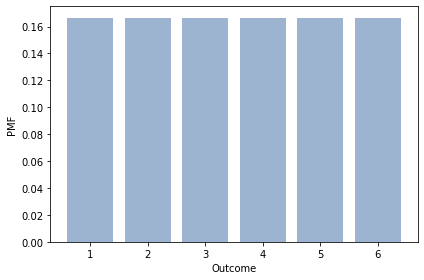

In [22]:
from utils import decorate

die.bar(alpha=0.4)
decorate(xlabel='Outcome',
         ylabel='PMF')

If we roll two dice and add them up, there are 11 possible outcomes, 2
through 12, but they are not equally likely. To compute the distribution
of the sum, we have to enumerate the possible outcomes. 

And that's how this function works:

In [23]:
def add_dist(pmf1, pmf2):
    """Compute the distribution of a sum."""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
    return res

The parameters are `Pmf` objects representing distributions.

The loops iterate though the quantities and probabilities in the `Pmf` objects.
Each time through the loop `q` gets the sum of a pair of quantities, and `p` gets the probability of the pair.
Because the same sum might appear more than once, we have to add up the total probability for each sum.

Notice a subtle element of this line:

```
            res[q] = res(q) + p
```

I use parentheses on the right side of the assignment, which returns 0 if `q` does not appear yet in `res`.
I use brackets on the left side of the assignment to create or update an element in `res`; using parentheses on the left side would not work.

`Pmf` provides `add_dist`, which does the same thing.
You can call it as a method, like this:

In [24]:
twice = die.add_dist(die)

Or as a function, like this:

In [25]:
twice = Pmf.add_dist(die, die)

And here's what the result looks like:

In [26]:
from utils import decorate

def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

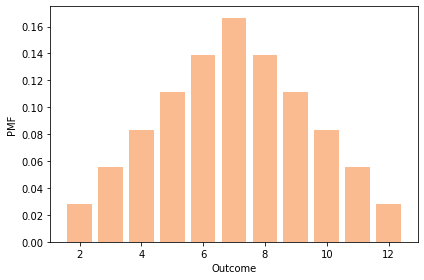

In [27]:
twice = add_dist(die, die)
twice.bar(color='C1', alpha=0.5)
decorate_dice()

If we have a sequence of `Pmf` objects that represent dice, we can compute the distribution of the sum like this:


In [28]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

As an example, we can make a list of three dice like this:

In [30]:
dice = [die] * 3
dice

[1    0.166667
 2    0.166667
 3    0.166667
 4    0.166667
 5    0.166667
 6    0.166667
 Name: , dtype: float64, 1    0.166667
 2    0.166667
 3    0.166667
 4    0.166667
 5    0.166667
 6    0.166667
 Name: , dtype: float64, 1    0.166667
 2    0.166667
 3    0.166667
 4    0.166667
 5    0.166667
 6    0.166667
 Name: , dtype: float64]

And we can compute the distribution of their sum like this.

In [32]:
thrice = add_dist_seq(dice)
thrice

,probs
3,0.004630
4,0.013889
5,0.027778
6,0.046296
7,0.069444
8,0.097222
9,0.115741
10,0.125000
11,0.125000
12,0.115741


The following figure shows what these three distributions look like:

-   한 개의 주사위에서 1부터 6까지 나올 확률은 동일하다.

-   두 주사위 눈의 합은 2부터 12까지 삼각분포로 나타난다.

-   세 주사위 눈의 합은 3부터 18까지 종 모양 분포로 나타난다.

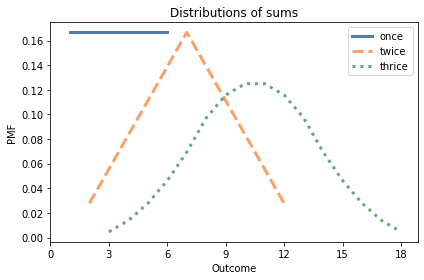

In [33]:
import matplotlib.pyplot as plt

die.plot(label='once')
twice.plot(label='twice', ls='--')
thrice.plot(label='thrice', ls=':')

plt.xticks([0,3,6,9,12,15,18])
decorate_dice(title='Distributions of sums')

여담으로, 이 예는 특정 조건 하에서 합의 분포가 종 모양의 정규분포로 수렴한다는 중심 극한 정리를 보여주고 있다.

## Gluten Sensitivity

In 2015 I read a paper that tested whether people diagnosed with gluten sensitivity (but not celiac disease) were able to distinguish gluten flour from non-gluten flour in a blind challenge
([you can read the paper here](https://onlinelibrary.wiley.com/doi/full/10.1111/apt.13372)).

Out of 35 subjects, 12 correctly identified the gluten flour based on
resumption of symptoms while they were eating it. Another 17 wrongly
identified the gluten-free flour based on their symptoms, and 6 were
unable to distinguish.

The authors conclude, "Double-blind gluten challenge induces symptom
recurrence in just one-third of patients."

This conclusion seems odd to me, because if none of the patients were
sensitive to gluten, we would expect some of them to identify the gluten flour by chance. 
So here's the question: based on this data, how many of the subjects are sensitive to gluten and how many are guessing?

We can use Bayes's Theorem to answer this question, but first we have to make some modeling decisions. I'll assume:

-   People who are sensitive to gluten have a 95% chance of correctly
    identifying gluten flour under the challenge conditions, and

-   People who are not sensitive have a 40% chance of identifying the
    gluten flour by chance (and a 60% chance of either choosing the
    other flour or failing to distinguish).

These particular values are arbitrary, but the results are not sensitive to these choices.

I will solve this problem in two steps. First, assuming that we know how many subjects are sensitive, I will compute the distribution of the data. 
Then, using the likelihood of the data, I will compute the posterior distribution of the number of sensitive patients.

The first is the **forward problem**; the second is the **inverse
problem**.

## The Forward Problem

35명의 피험자 중 10명이 글루텐에 민감하다고 가정하자. 즉 25명은 민감하지 않다는 말이다.

In [34]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

민감한 피험자 각각은 글루텐 밀가루를 구분할 수 있는 확률이 95% 이므로, 올바른 판별 결과는 이항분포를 따른다.

I'll use `make_binomial`, which we defined in <<_TheBinomialDistribution>>, to make a `Pmf` that represents the binomial distribution.

In [36]:
from utils import make_binomial

dist_sensitive = make_binomial(num_sensitive, 0.95)
dist_insensitive = make_binomial(num_insensitive, 0.40)

이 결과는 각 그룹에서 정확하게 글루텐을 분류한 횟수의 분포이.

이제 여기에 `add_dist` 를 사용해서 분류한 수의 총 합의 분포를 구하자.

In [37]:
dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)

Here are the results:

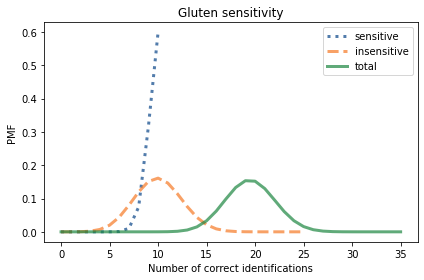

In [38]:
dist_sensitive.plot(label='sensitive', ls=':')
dist_insensitive.plot(label='insensitive', ls='--')
dist_total.plot(label='total')

decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

We expect most of the sensitive subjects to identify the gluten flour correctly.
Of the 25 insensitive subjects, we expect about 10 to identify the gluten flour by chance.
So we expect about 20 correct identifications in total.

This is the answer to the forward problem: given the number of sensitive subjects, we can compute the distribution of the data.

## The Inverse Problem

이제 역산 문제를 풀어보자. 주어진 데이터를 가지고 민감한 피험자의 수에 대한 사후분포를 구해보자.

방법은 다음과 같다. `num_sensitive` 의 가능한 값에 대해 반복문을 통해 데이터의 분포를 구해보자.

In [39]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, 0.95)
    dist_insensitive = make_binomial(num_insensitive, 0.4)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

The loop enumerates the possible values of `num_sensitive`.
For each value, it computes the distribution of the total number of correct identifications, and stores the result as a column in a Pandas `DataFrame`.

In [45]:
table.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.719071e-08,1.432559e-09,1.193799e-10,9.948326e-12,8.290272e-13,6.908560e-14,5.757133e-15,4.797611e-16,3.998009e-17,3.331674e-18,...,1.501694e-36,1.251411e-37,1.042843e-38,8.690357e-40,7.241964e-41,6.034970e-42,5.029142e-43,4.190952e-44,3.492460e-45,2.910383e-46
1,4.011165e-07,5.968996e-08,7.162795e-09,7.792856e-10,8.013930e-11,7.944844e-12,7.676178e-13,7.276377e-14,6.796616e-15,6.274653e-16,...,7.508469e-34,6.486483e-35,5.596590e-36,4.823148e-37,4.152060e-38,3.570691e-39,3.067777e-40,2.633315e-41,2.258457e-42,1.935405e-43
2,4.545987e-06,9.741401e-07,1.709122e-07,2.506426e-08,3.269131e-09,3.940182e-10,4.490244e-11,4.908756e-12,5.197412e-13,5.365476e-14,...,1.806613e-31,1.620070e-32,1.449030e-33,1.292922e-34,1.151034e-35,1.022555e-36,9.066202e-38,8.023344e-39,7.088005e-40,6.251357e-41


The following figure shows selected columns from the `DataFrame`, corresponding to different hypothetical values of `num_sensitive`:

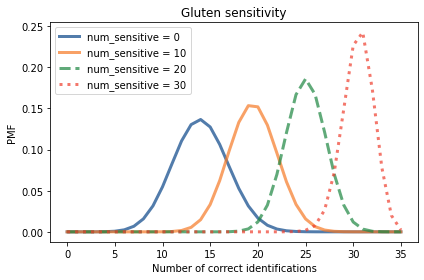

In [41]:
table[0].plot(label='num_sensitive = 0')
table[10].plot(label='num_sensitive = 10')
table[20].plot(label='num_sensitive = 20', ls='--')
table[30].plot(label='num_sensitive = 30', ls=':')
    
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity')

이제 이 테이블을 사용해서 데이터의 likelihood를 구하자.

In [42]:
likelihood1 = table.loc[12]

`loc`는 데이터 프레임의 한 열을 가져온다. 12번 인덱스의 열은 각 `num_sensitive`의 가설 값에 대한 12개가 제대로 분류된 경우의 확률값이 들어있다. 그리고 이것이 우리가 베이지안 갱신에서 정확히 필요한 likelihood다. 여기서는 `num_sensitive`의 모든 값이 동일하게 발생 가능하다는 균등사전분포를 사용한다.

In [46]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

And here's the update:


In [48]:
posterior1 = prior * likelihood1
posterior1.normalize()

0.4754741648615132

비교를 위해, 다른 가능한 결괏값인, 20개가 제대로 분류된 경우의 사후분포도 같이 구해보도록 하자.

In [49]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887375

The following figure shows posterior distributions of `num_sensitive` based on the actual data, 12 correct identifications, and the other possible outcome, 20 correct identifications.

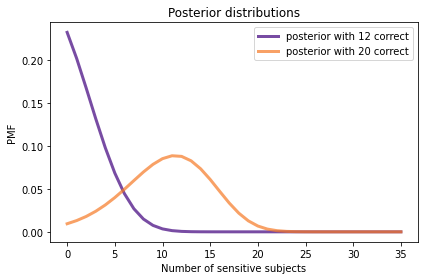

In [50]:
posterior1.plot(label='posterior with 12 correct', color='C4')
posterior2.plot(label='posterior with 20 correct', color='C1')

decorate(xlabel='Number of sensitive subjects',
         ylabel='PMF',
         title='Posterior distributions')

12개가 정확히 분류된 경우, 어떤 피험자도 글루텐에 민감하지 않다는 가장 가능성 있는 결론이 도출된다.

만약 20개가 정확히 분류되었다면, 가장 가능성 있는 결론은 11명 ~ 12명의 피험자가 민감한 것이다.

In [51]:
posterior1.max_prob()

0

In [52]:
posterior2.max_prob()

11

## Summary

This chapter presents two topics that are almost unrelated except that they make the title of the chapter catchy.

The first part of the chapter is about Bayes's Rule, evidence, and how we can quantify the strength of evidence using a likelihood ratio or Bayes factor.

The second part is about `add_dist`, which computes the distribution of a sum.
We can use this function to solve forward and inverse problems; that is, given the parameters of a system, we can compute the distribution of the data or, given the data, we can compute the distribution of the parameters.

In the next chapter, we'll compute distributions for minimums and maximums, and use them to solve more Bayesian problems.
But first you might want to work on these exercises.

## Exercises

**Exercise:** Let's use Bayes's Rule to solve the Elvis problem from <<_Distributions>>:

> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

In 1935, about 2/3 of twins were fraternal and 1/3 were identical.
The question contains two pieces of information we can use to update this prior.

* First, Elvis's twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

* Also, Elvis's twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

If you are curious about where those numbers come from, I wrote [a blog post about it](https://www.allendowney.com/blog/2020/01/28/the-elvis-problem-revisited).

In [56]:
# Solution goes here

likelihood_ratio1 = 2
likelihood_ratio2 = 1.25
post_odds = odds(1/3) * likelihood_ratio1 * likelihood_ratio2
prob(post_odds)

0.5555555555555555

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** The following is an [interview question that appeared on glassdoor.com](https://www.glassdoor.com/Interview/You-re-about-to-get-on-a-plane-to-Seattle-You-want-to-know-if-you-should-bring-an-umbrella-You-call-3-random-friends-of-y-QTN_519262.htm), attributed to Facebook:

> You're about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it's raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that "Yes" it is raining. What is the probability that it's actually raining in Seattle?

Use Bayes's Rule to solve this problem.  As a prior you can assume that it rains in Seattle about 10% of the time.

This question causes some confusion about the differences between Bayesian and frequentist interpretations of probability; if you are curious about this point, [I wrote a blog article about it](http://allendowney.blogspot.com/2016/09/bayess-theorem-is-not-optional.html).

In [58]:
# Solution goes here
prior_odds = odds(0.1)
post_odds = prior_odds * 2 * 2 * 2
prob(post_odds)

0.4705882352941177

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** [According to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking), people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

[Also according to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/adult_data/cig_smoking/index.htm), about 14\% of adults in the U.S. are smokers.
If you learn that someone has lung cancer, what is the probability they are a smoker?

In [59]:
# Solution goes here
post_odds = odds(0.14) * 25
prob(post_odds)

0.8027522935779816

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** In *Dungeons & Dragons*, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die.
A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use `Pmf.sub_dist` to subtract a constant amount, like 3, from a `Pmf`.

0.4545454545454545

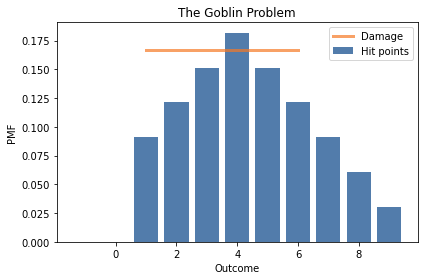

In [70]:
# Solution goes here

d6 = make_die(6)
hp_before = Pmf.add_dist(d6, d6)

hp_after = Pmf.sub_dist(hp_before, 3)

# 합이 2, 3일때의 사후확률을 0으로 할당
hp_after[[-1, 0]] = 0
hp_after.normalize()

damage = d6

hp_after.bar(label='Hit points')
damage.plot(label='Damage', color='C1')
decorate_dice('The Goblin Problem')

points_left = Pmf.sub_dist(hp_after, damage)

points_left.prob_le(0)

In [ ]:

# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it twice, multiply the outcomes, and report that the product is 12.
What is the probability that I chose the 8-sided die?

Hint: `Pmf` provides a function called `mul_dist` that takes two `Pmf` objects and returns a `Pmf` that represents the distribution of the product.

In [88]:
# Solution goes here

prior = Pmf(1, [6, 8, 12])

d6 = make_die(6)
d8 = make_die(8)
d12 = make_die(12)
res6 = Pmf.mul_dist(d6, d6)
res8 = Pmf.mul_dist(d8, d8)
res12 = Pmf.mul_dist(d12, d12)

res6[12], res8[12], res12[12]

post = prior * [res6[12], res8[12], res12[12]]
post.normalize()
post

,probs
6,0.516129
8,0.290323
12,0.193548


In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

**Exercise:** *Betrayal at House on the Hill* is a strategy game in which characters with different attributes explore a haunted house.  Depending on their attributes, the characters roll different numbers of dice.  For example, if attempting a task that depends on knowledge, Professor Longfellow rolls 5 dice, Madame Zostra rolls 4, and Ox Bellows rolls 3.  Each die yields 0, 1, or 2 with equal probability.  

If a randomly chosen character attempts a task three times and rolls a total of 3 on the first attempt, 4 on the second, and 5 on the third, which character do you think it was?

In [109]:
# Solution goes here

# 5번 던짐
prior = Pmf(1/3, [0, 1, 2])
tmp = Pmf(1/3, [0, 1, 2])
for _ in range(4):
  tmp = Pmf.add_dist(tmp, prior)
Prof = tmp
# 4번 던짐
prior = Pmf(1/3, [0, 1, 2])
tmp = Pmf(1/3, [0, 1, 2])
for _ in range(3):
  tmp = Pmf.add_dist(tmp, prior)
Madame = tmp
# 3번 던짐
prior = Pmf(1/3, [0, 1, 2])
tmp = Pmf(1/3, [0, 1, 2])
for _ in range(2):
  tmp = Pmf.add_dist(tmp, prior)
Ox = tmp

prior = Pmf(1, ['Prof', 'Madame', 'Ox'])

post = prior * [Prof[3], Madame[3], Ox[3]] * [Prof[4], Madame[4], Ox[4]] * [Prof[5], Madame[5], Ox[5]]
post.normalize()
post 

,probs
Prof,0.235762
Madame,0.449704
Ox,0.314534


**Exercise:** There are 538 members of the United States Congress. Suppose we audit their investment portfolios and find that 312 of them out-perform the market.
Let's assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance.  How many members of Congress are honest?

In [131]:
# Solution goes here

prior = Pmf(1, np.arange(n+1))
n = 538

import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive

    dist_sensitive = make_binomial(num_sensitive, 0.5)
    dist_insensitive = make_binomial(num_insensitive, 0.9)

    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
    table[num_sensitive] = dist_total

<ipython-input-131-8d5e59c53ed6>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  table[num_sensitive] = dist_total


430 431.48821145019957


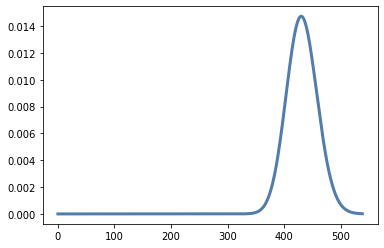

In [132]:
# Solution goes here
likelihood = table.loc[312]
posterior = prior * likelihood
posterior.normalize()
posterior.plot()
print(posterior.max_prob(), posterior.mean())

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here